# Quick start with Jupyter

We suggest that the user first gets familiarized with the accepted [syntax](https://clingraph.readthedocs.io/en/latest/clingraph/syntax.html).

For the details and advanced options please go to the [api documentation](https://clingraph.readthedocs.io/en/latest/clingraph/api.html#clingraph).

## Install
The installation in the next two cells is **ONLY** necessary for online usage in [binder](https://mybinder.org).

In [ ]:
cd ..

In [ ]:
!pip install . > /dev/null

## Basic usage

In [8]:
import clingraph
from clingraph import Clingraph

### Create a clingraph from string

Loads a string of facts and computes the [graphviz objects](https://graphviz.readthedocs.io/en/stable/) by calling `compute_graphs()`.

In [9]:
g = Clingraph()
g.add_fact_string('''
node(oscar). 
node(andres). 
edge((oscar,andres)). 
attr(node,andres,label,"\\veeAndres").
attr(node,oscar,label,"Oscar").
attr(edge,(oscar,andres),label,"friends").''')
g.compute_graphs()

DEBUG:  - Adding string: 
node(oscar). 
node(andres). 
edge((oscar,andres)). 
attr(node,andres,label,"\veeAndres").
attr(node,oscar,label,"Oscar").
attr(edge,(oscar,andres),label,"friends").
DEBUG:  - Program before encode
DEBUG:  - 
node(oscar). 
node(andres). 
edge((oscar,andres)). 
attr(node,andres,label,"\veeAndres").
attr(node,oscar,label,"Oscar").
attr(edge,(oscar,andres),label,"friends").
DEBUG:  - Program after encode
DEBUG:  - 
node(oscar). 
node(andres). 
edge((oscar,andres)). 
attr(node,andres,label,"\\veeAndres").
attr(node,oscar,label,"Oscar").
attr(edge,(oscar,andres),label,"friends").


##### Show the cligraph object

INFO:  - Image saved in out/default.png


'default'

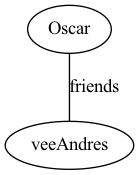

In [4]:
g

##### Print a clingraph source code

This source code uses the [DOT Language](https://graphviz.org/doc/info/lang.html)

In [4]:
print(g.source())

//----------default----------
graph default {
	andres [label=Andres]
	oscar [label=Oscar]
	oscar -- andres [label=friends]
}



##### Get the graphviz object

Obtains the graphviz object for the default graph

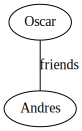

In [5]:
g.get_graphviz()

### Create a clingraph from file

The file contents representing two different graphs.

In [10]:
!cat ../examples/basic/example2/example_2.lp

    graph(toms_family).
    graph(bills_family).

    node(tom, toms_family).
    node(max, toms_family).
    edge((tom, max), toms_family).

    node(bill, bills_family).
    node(jen, bills_family).
    edge((bill, jen), bills_family).


##### Load the facts in the file

In [11]:
g = Clingraph()
g.add_fact_file("../examples/basic/example2/example_2.lp")

##### Add additional facts from a string and compute the graphs

In [12]:
g.add_fact_string("attr(graph_nodes,toms_family,color,red).attr(graph_nodes,bills_family,color,blue).")
g.compute_graphs()

DEBUG:  - Adding string: attr(graph_nodes,toms_family,color,red).attr(graph_nodes,bills_family,color,blue).
DEBUG:  - Program before encode
DEBUG:  - attr(graph_nodes,toms_family,color,red).attr(graph_nodes,bills_family,color,blue).
DEBUG:  - Program after encode
DEBUG:  - attr(graph_nodes,toms_family,color,red).attr(graph_nodes,bills_family,color,blue).


##### Show the clingraph which contains two different graphs

INFO:  - Image saved in out/toms_family.png
INFO:  - Image saved in out/bills_family.png


'toms_family'

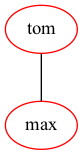

'bills_family'

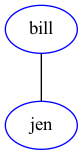

In [13]:
g

##### Get the graphviz object for a specific graph

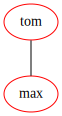

In [14]:
g.get_graphviz('toms_family')

##### Show source of one graph

In [15]:
print(g.get_graphviz('toms_family').source)

graph toms_family {
	node [color=red]
	tom
	max
	tom -- max
}



##### Save all graphs 

In [16]:
g.save(directory="out",format="pdf")

INFO:  - Image saved in out/toms_family.pdf
INFO:  - Image saved in out/bills_family.pdf


## Clingo integration

We show how to integrate clingraph with the [clingo API](https://www.cs.uni-potsdam.de/~kaminski/pyclingo-cffi/clingo/index.html).

For this we use a `MultiModelClingraph` that can handle one Clingraph for each stable model.

### Create a clingraph from each model retuned in the clingos solve

This is achived my passing the `g.add_model` method in the `on_model` callback argument for `solve`.

In this case our program has two stable models. One with `node(a)` and the other one with `node(b)`

In [17]:
from clingraph import MultiModelClingraph
from clingo import Control
ctl = Control(["-n2"])
g = MultiModelClingraph()
ctl.add("base", [], "1{node(a);node(b)}1.")
ctl.ground([("base", [])])
ctl.solve(on_model=g.add_model)
print(g.source())


//=========================
//	Model: 1 Costs: [] 
//=========================

// Graph hasn't been computed yet

//=========================
//	Model: 2 Costs: [] 
//=========================

// Graph hasn't been computed yet



In [18]:
g.compute_graphs()

In [19]:
print(g.source())


//=========================
//	Model: 1 Costs: [] 
//=========================

//----------default----------
graph default {
	a
}

//=========================
//	Model: 2 Costs: [] 
//=========================

//----------default----------
graph default {
	b
}



##### Print the clingraphs obtained for each model

In [20]:
g.clingraphs

{1: {'clingraph': <clingraph.clingraph.Clingraph at 0x1096625f0>,
  'name': 'model-0001',
  'costs': []},
 2: {'clingraph': <clingraph.clingraph.Clingraph at 0x10968c4c0>,
  'name': 'model-0002',
  'costs': []}}

##### Obtain the clingraph for the first model

INFO:  - Image saved in out/default.png


'default'

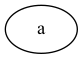

In [21]:
g.get_clingraph(1)

##### Obtain the clingraph for the second model

INFO:  - Image saved in out/default.png


'default'

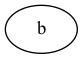

In [22]:
g.get_clingraph(2)

##### Show the source code of the first model

In [23]:
print(g.source(selected_models=['1']))


//=========================
//	Model: 1 Costs: [] 
//=========================

//----------default----------
graph default {
	a
}



In [24]:
print(g.get_clingraph(1).source())

//----------default----------
graph default {
	a
}

